In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

In [2]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = 'ee9e18d5-ce9f-4e42-80b4-0a4ad3f16d6e'
resource_group = 'DP_DEV_DIA'
workspace_name = 'ML101'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='NYC_taxi_train_data')
train_data=dataset.to_pandas_dataframe()

In [3]:
train_data.head()

,Key,Energy_units,Ridestart_datetime,Ridestart_longitude,Ridestart_latitude,Rideend_longitude,Rideend_latitude,Weight_indicators
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
import calendar
train_data['Ridestart_date']=train_data['Ridestart_datetime'].dt.date
train_data['Ridestart_day']=train_data['Ridestart_datetime'].apply(lambda X:X.day)
train_data['Ridestart_hour']=train_data['Ridestart_datetime'].apply(lambda X:X.hour)
train_data['Ridestart_day_of_week']=train_data['Ridestart_datetime'].apply(lambda X:calendar.day_name[X.weekday()])
train_data['Ridestart_month']=train_data['Ridestart_datetime'].apply(lambda X:X.month)
train_data['Ridestart_year']=train_data['Ridestart_datetime'].apply(lambda X:X.year)
train_data.head()

,Key,Energy_units,Ridestart_datetime,Ridestart_longitude,Ridestart_latitude,Rideend_longitude,Rideend_latitude,Weight_indicators,Ridestart_date,Ridestart_day,Ridestart_hour,Ridestart_day_of_week,Ridestart_month,Ridestart_year
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [5]:
train_data['Energy_units'] = train_data['Energy_units']

In [6]:
train_data.describe()

,Energy_units,Ridestart_longitude,Ridestart_latitude,Rideend_longitude,Rideend_latitude,Weight_indicators,Ridestart_day,Ridestart_hour,Ridestart_month,Ridestart_year
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048565e+06,1.048565e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.134548e+01,-7.252724e+01,3.993094e+01,-7.252750e+01,3.992496e+01,1.684902e+00,1.569890e+01,1.350858e+01,6.267647e+00,2.011741e+03
std,9.820072e+00,1.200798e+01,7.725806e+00,1.141154e+01,8.529585e+00,1.323155e+00,8.681028e+00,6.513878e+00,3.436204e+00,1.860606e+00
min,-4.490000e+01,-3.377681e+03,-3.116285e+03,-3.383297e+03,-3.114339e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.009000e+03
25%,6.000000e+00,-7.399207e+01,4.073496e+01,-7.399138e+01,4.073406e+01,1.000000e+00,8.000000e+00,9.000000e+00,3.000000e+00,2.010000e+03
50%,8.500000e+00,-7.398180e+01,4.075267e+01,-7.398014e+01,4.075318e+01,1.000000e+00,1.600000e+01,1.400000e+01,6.000000e+00,2.012000e+03
75%,1.250000e+01,-7.396711e+01,4.076714e+01,-7.396367e+01,4.076812e+01,2.000000e+00,2.300000e+01,1.900000e+01,9.000000e+00,2.013000e+03
max,5.000000e+02,2.522271e+03,2.621628e+03,1.717003e+03,1.989728e+03,2.080000e+02,3.100000e+01,2.300000e+01,1.200000e+01,2.015000e+03


# **Removing Missing Value**

In [7]:
train_data.dropna(how='any', axis='rows', inplace=True)

# Removing observations with erroneous values
mask = train_data['Ridestart_longitude'].between(-75, -73)
mask &= train_data['Rideend_longitude'].between(-75, -73)
mask &= train_data['Ridestart_latitude'].between(40, 42)
mask &= train_data['Rideend_latitude'].between(40, 42)
mask &= train_data['Weight_indicators'].between(0, 8)
mask &= train_data['Energy_units'].between(0, 250)

train_data = train_data[mask]

In [8]:
train_data.describe()

,Energy_units,Ridestart_longitude,Ridestart_latitude,Rideend_longitude,Rideend_latitude,Weight_indicators,Ridestart_day,Ridestart_hour,Ridestart_month,Ridestart_year
count,1.026738e+06,1.026738e+06,1.026738e+06,1.026738e+06,1.026738e+06,1.026738e+06,1.026738e+06,1.026738e+06,1.026738e+06,1.026738e+06
mean,1.132392e+01,-7.397516e+01,4.075106e+01,-7.397427e+01,4.075141e+01,1.684975e+00,1.569433e+01,1.350895e+01,6.268732e+00,2.011739e+03
std,9.645918e+00,3.899071e-02,2.999171e-02,3.807419e-02,3.309713e-02,1.307654e+00,8.681211e+00,6.511207e+00,3.437665e+00,1.863300e+00
min,0.000000e+00,-7.496814e+01,4.005272e+01,-7.496426e+01,4.004118e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.009000e+03
25%,6.000000e+00,-7.399228e+01,4.073657e+01,-7.399157e+01,4.073559e+01,1.000000e+00,8.000000e+00,9.000000e+00,3.000000e+00,2.010000e+03
50%,8.500000e+00,-7.398209e+01,4.075339e+01,-7.398059e+01,4.075388e+01,1.000000e+00,1.600000e+01,1.400000e+01,6.000000e+00,2.012000e+03
75%,1.250000e+01,-7.396833e+01,4.076756e+01,-7.396534e+01,4.076841e+01,2.000000e+00,2.300000e+01,1.900000e+01,9.000000e+00,2.013000e+03
max,2.500000e+02,-7.301175e+01,4.180025e+01,-7.301178e+01,4.192382e+01,6.000000e+00,3.100000e+01,2.300000e+01,1.200000e+01,2.015000e+03


In [9]:
train_data.isnull().sum()

Key                      0
Energy_units             0
Ridestart_datetime       0
Ridestart_longitude      0
Ridestart_latitude       0
Rideend_longitude        0
Rideend_latitude         0
Weight_indicators        0
Ridestart_date           0
Ridestart_day            0
Ridestart_hour           0
Ridestart_day_of_week    0
Ridestart_month          0
Ridestart_year           0
dtype: int64

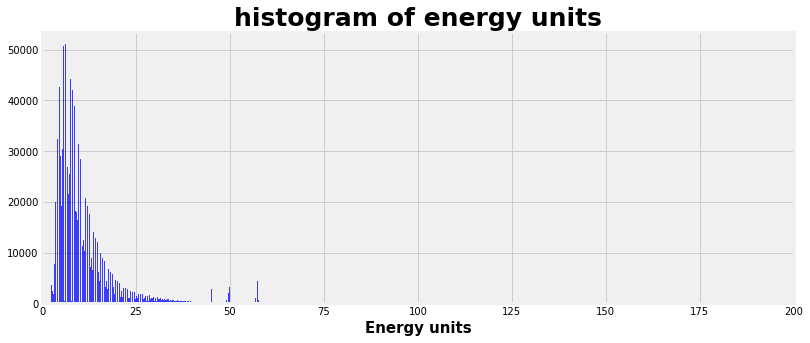

In [10]:
#visualizing target variable
plt.figure(figsize=(12,5))
n, bins, patches = plt.hist(train_data.Energy_units,1000,facecolor='blue',alpha=0.75)
plt.xlabel('Energy units',fontsize=15,fontweight='bold')
plt.title('histogram of energy units',fontsize=25,fontweight='bold')
plt.xlim(0,200)
plt.show();

/tmp/ipykernel_8682/2633310317.py:2: RuntimeWarning: divide by zero encountered in log
  sns.kdeplot(np.log(train_data['Energy_units'].values)).set_title(


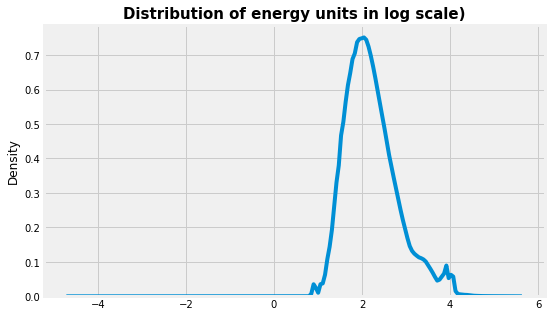

In [11]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(train_data['Energy_units'].values)).set_title(
    "Distribution of energy units in log scale)",fontsize=15,fontweight='bold');

In [12]:
#Analysing top 5 energy units
train_data['Energy_units'].value_counts(normalize=True).iloc[:5]

6.5    0.048752
4.5    0.041164
8.5    0.037509
5.3    0.029327
5.7    0.029113
Name: Energy_units, dtype: float64

Text(0, 0.5, 'count')

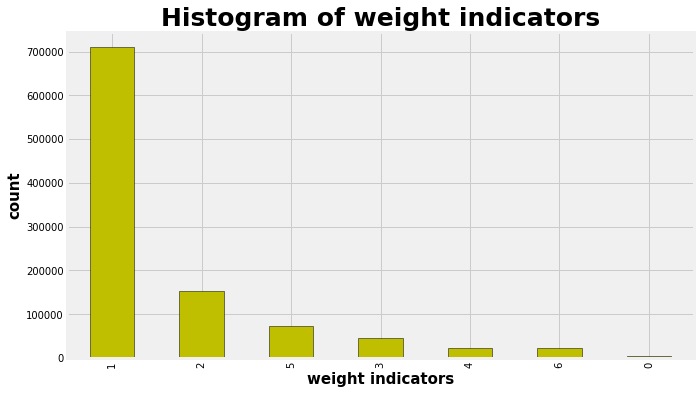

In [13]:
#weight indicators
plt.figure(figsize=(10,6))
train_data['Weight_indicators'].value_counts().plot.bar(color='y',edgecolor='k');
plt.title('Histogram of weight indicators',fontsize=25,fontweight='bold')
plt.xlabel('weight indicators',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=15,fontweight='bold')

Text(0, 0.5, 'count')

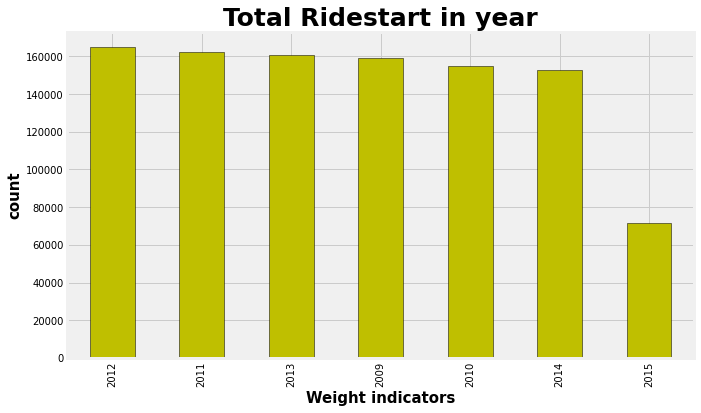

In [14]:
plt.figure(figsize=(10,6))
train_data['Ridestart_year'].value_counts().plot.bar(color='y',edgecolor='k');
plt.title('Total Ridestart in year',fontsize=25,fontweight='bold')
plt.xlabel('Weight indicators',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=15,fontweight='bold')

Text(0, 0.5, 'count')

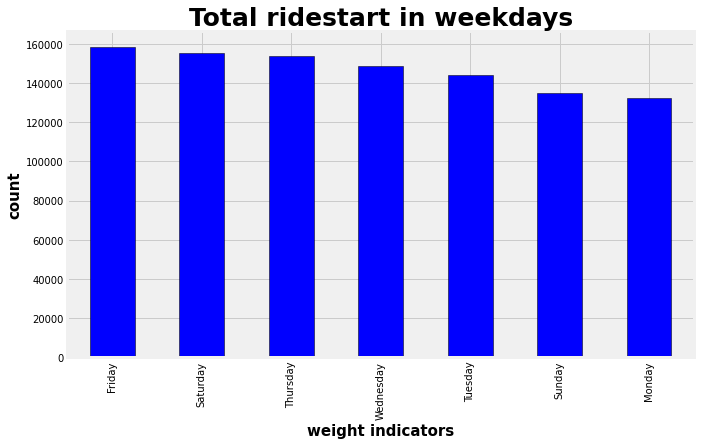

In [15]:
plt.figure(figsize=(10,6))
train_data['Ridestart_day_of_week'].value_counts().plot.bar(color='b',edgecolor='k');
plt.title('Total ridestart in weekdays',fontsize=25,fontweight='bold')
plt.xlabel('weight indicators',fontsize=15,fontweight='bold')
plt.ylabel('count',fontsize=15,fontweight='bold')

In [16]:
#analysing number of passengers
train_data['Weight_indicators'].value_counts()

1    709632
2    152245
5     72519
3     44969
4     22000
6     21734
0      3639
Name: Weight_indicators, dtype: int64

(-74.03, -73.75)

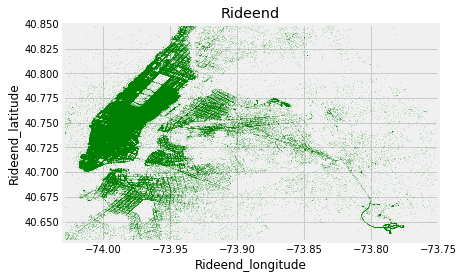

In [17]:
#plot heatmap of ridestart and rideend within new york
city_long_border=(-74.03,-73.75)
city_lat_border=(40.63,40.85)

train_data.plot(kind='scatter',x='Rideend_longitude',y='Rideend_latitude',
                     color='green',
                     s=.02,alpha=.6)
plt.title("Rideend")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)


(-74.03, -73.75)

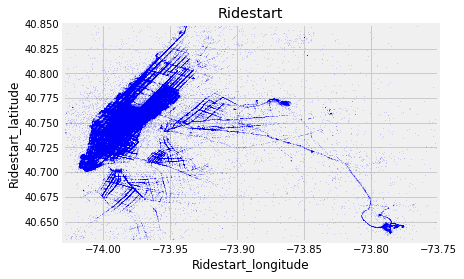

In [18]:
train_data.plot(kind='scatter',x='Ridestart_longitude',y='Ridestart_latitude',
                     color='blue',
                     s=.02,alpha=.6)
plt.title("Ridestart")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [19]:
def distance(lat1,lon1,lat2,lon2):
    p=0.01745329
    a=0.5-np.cos((lat2-lat1)*p)/2+np.cos(lat1*p)*np.cos(lat2*p)*(1-np.cos((lon2-lon1)*p))/2
    return 0.6213712*12742*np.arcsin(np.sqrt(a))

In [20]:
#add new column to dataframe with distane in miles
train_data['distance_miles']=distance(train_data.Ridestart_latitude,train_data.Ridestart_longitude,\
                                         train_data.Rideend_latitude,train_data.Rideend_longitude)
train_data.head()

,Key,Energy_units,Ridestart_datetime,Ridestart_longitude,Ridestart_latitude,Rideend_longitude,Rideend_latitude,Weight_indicators,Ridestart_date,Ridestart_day,Ridestart_hour,Ridestart_day_of_week,Ridestart_month,Ridestart_year,distance_miles
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250669
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


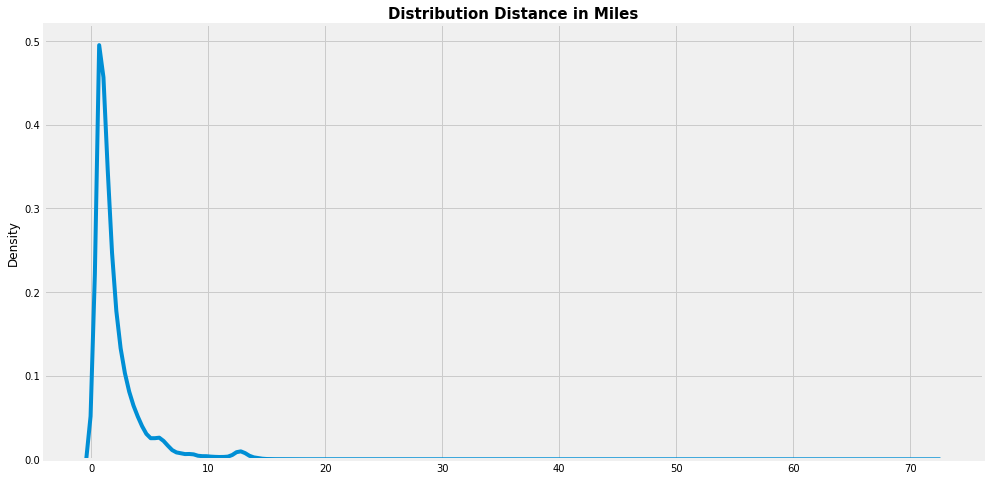

In [21]:
plt.figure(figsize=(15,8))
sns.kdeplot(train_data['distance_miles'].values).set_title(
    "Distribution Distance in Miles",fontsize=15,fontweight='bold');

In [22]:
# imputing categorical variables
Variables={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
year={2012: 1,2013: 2,2011: 3,2009: 4,2010: 5,2014: 6,2015: 7}
train_data['Ridestart_year']=train_data['Ridestart_year'].map(year)
train_data['Ridestart_day_of_week']=train_data['Ridestart_day_of_week'].map(Variables)
train_data.drop(['Ridestart_datetime','Ridestart_date'],axis=1,inplace=True)
train_data.head()


,Key,Energy_units,Ridestart_longitude,Ridestart_latitude,Rideend_longitude,Rideend_latitude,Weight_indicators,Ridestart_day,Ridestart_hour,Ridestart_day_of_week,Ridestart_month,Ridestart_year,distance_miles
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,0.640487
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,5.250669
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3,0.863411
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,1,1.739386
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,1.242218


# **Linear Regression Model**

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026738 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Key                    1026738 non-null  object 
 1   Energy_units           1026738 non-null  float64
 2   Ridestart_longitude    1026738 non-null  float64
 3   Ridestart_latitude     1026738 non-null  float64
 4   Rideend_longitude      1026738 non-null  float64
 5   Rideend_latitude       1026738 non-null  float64
 6   Weight_indicators      1026738 non-null  int64  
 7   Ridestart_day          1026738 non-null  int64  
 8   Ridestart_hour         1026738 non-null  int64  
 9   Ridestart_day_of_week  1026738 non-null  int64  
 10  Ridestart_month        1026738 non-null  int64  
 11  Ridestart_year         1026738 non-null  int64  
 12  distance_miles         1026738 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 109.7+ MB


In [24]:
from sklearn.model_selection import train_test_split
X=train_data.drop(['Key','Energy_units'],axis=1)
y=train_data['Energy_units']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=80)

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))

0.7377911640574446


In [26]:
y_pred=lr.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

23.282900252637337

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.825235771714926

In [29]:
import folium 
Ridestart_locations=folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',
zoom_start=12)
for each in train_data[:500].iterrows():
    folium.CircleMarker([each[1]['Ridestart_latitude'],each[1]['Ridestart_longitude']],
    radius=3,
    color='blue',
    popup=str(each[1]['Ridestart_latitude'])+','+str(each[1]['Ridestart_longitude']),
    fill_color='#FD8A6C'
    ).add_to(Ridestart_locations)
Ridestart_locations

In [30]:
import folium 
Rideend_locations=folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',
zoom_start=12)
for each in train_data[:500].iterrows():
    folium.CircleMarker([each[1]['Rideend_latitude'],each[1]['Rideend_longitude']],
    radius=3,
    color='red',
    popup=str(each[1]['Rideend_latitude'])+','+str(each[1]['Rideend_longitude']),
    fill_color='#FD8A6C'
    ).add_to(Rideend_locations)
Rideend_locations

In [31]:
import folium
Enter_coordinates=folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',
                             zoom_start=12)
popup=folium.LatLngPopup()
popup=folium.ClickForMarker()

Enter_coordinates.add_child(popup)
Enter_coordinates


In [43]:
print('Enter Your Information to Predict Fare: ')

Ridestart_coordinates=str(input("Enter Ridestart Coordinates : "))
Rideend_coordinates=str(input("Enter Rideend Coordinates : "))

Ridestart_latitude=float(Ridestart_coordinates.split(',')[0])
Ridestart_longitude=float(Ridestart_coordinates.split(',')[1])

Rideend_latitude=float(Rideend_coordinates.split(',')[0])
Rideend_longitude=float(Rideend_coordinates.split(',')[1])

Enter_date=input("Enter Date (DD/MM/Year)")

Weight_indicators=int(input('Enter number of passengers: '))

Ridestart_day=int(Enter_date.split('/')[0])
Ridestart_hour=int(input('Enter hour: '))


Ridestart_day_of_week=int(input('Enter week: '))

Ridestart_month=int(Enter_date.split('/')[1])

Ridestart_year=int(Enter_date.split('/')[2])

distance_miles=distance(Ridestart_latitude,Ridestart_longitude,Rideend_latitude,Ridestart_longitude)

my_array=np.array([Ridestart_latitude,Ridestart_longitude,Rideend_latitude,Rideend_longitude,Weight_indicators,
        Ridestart_day,Ridestart_hour,Ridestart_day_of_week,Ridestart_month,Ridestart_year,distance_miles])

print('Energy units($) : ',lr.predict(my_array.reshape(1,-1)))

Enter Your Information to Predict Fare: 
Energy units($) :  [6511.75832337]


In [33]:
X_train.shape

(1016470, 11)

In [34]:
y_train.shape

(1016470,)

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
re=DecisionTreeRegressor(criterion="mse",max_depth=10,min_samples_split=10,random_state=5)

In [37]:
re.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

In [38]:
y_pred=re.predict(X_test)

In [39]:
y_pred

array([ 6.54109319,  5.49906008, 19.29678171, ..., 14.19594526,
        6.01126405,  8.84091484])

In [40]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

14.530877835383228

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.8119388551474995

In [42]:
print('Enter Your Information to Predict Fare: ')

Ridestart_coordinates=str(input("Enter Ridestart Coordinates : "))
Rideend_coordinates=str(input("Enter Rideend Coordinates : "))

Ridestart_latitude=float(Ridestart_coordinates.split(',')[0])
Ridestart_longitude=float(Ridestart_coordinates.split(',')[1])

Rideend_latitude=float(Rideend_coordinates.split(',')[0])
Rideend_longitude=float(Rideend_coordinates.split(',')[1])

Enter_date=input("Enter Date (DD/MM/Year)")

Weight_indicators=int(input('Enter number of passengers: '))

Ridestart_day=int(Enter_date.split('/')[0])
Ridestart_hour=int(input('Enter hour: '))


Ridestart_day_of_week=int(input('Enter week: '))

Ridestart_month=int(Enter_date.split('/')[1])

Ridestart_year=int(Enter_date.split('/')[2])

distance_miles=distance(Ridestart_latitude,Ridestart_longitude,Rideend_latitude,Ridestart_longitude)

my_array=np.array([Ridestart_latitude,Ridestart_longitude,Rideend_latitude,Rideend_longitude,Weight_indicators,
        Ridestart_day,Ridestart_hour,Ridestart_day_of_week,Ridestart_month,Ridestart_year,distance_miles])

print('Energy units($) : ',re.predict(my_array.reshape(1,-1)))

Enter Your Information to Predict Fare: 
Energy units($) :  [10.33247273]
